In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [5]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import*
from blurr.text.data.all import*
from blurr.text.modeling.all import*

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for squad contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/squad/squad.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/Capstone3

/content/drive/MyDrive/Capstone3


In [8]:
df = pd.read_csv("imdb_movies.csv")
df.head()

,movie title,Run Time,Rating,User Rating,Generes,Overview,Plot Kyeword,Director,Top 5 Casts,Writer,year,path
0,Top Gun: Maverick,"$170,000,000 (estimated)",8.6,187K,"['Action', 'Drama']","After more than thirty years of service as one of the Navy's top aviators, Pete Mitchell is where he belongs, pushing the envelope as a courageous test pilot and dodging the advancement in rank that would ground","['fighter jet', 'sequel', 'u.s. navy', 'fighter aircraft', 'pilot', 'naval aviation', 'jet fighter', 'military pilot', 'aviation', 'aircraft']",Joseph Kosinski,"['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise', 'Jennifer Connelly', 'Miles Teller']",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,2 hours 27 minutes,6,56K,"['Action', 'Adventure', 'Sci-Fi']","Four years after the destruction of Isla Nublar, dinosaurs now live--and hunt--alongside humans all over the world. This fragile balance will reshape the future and determine, once and for all, whether human beings are to remain the apex predators on a planet they now share with ... Read all","['dinosaur', 'jurassic park', 'tyrannosaurus rex', 'velociraptor', 'sequel', 'alan grant character', 'ellie sattler character', 'ian malcolm character', 'dinosaur feature', 'animal trainer']",Colin Trevorrow,"['Colin Trevorrow', 'Derek Connolly', 'Chris Pratt', 'Bryce Dallas Howard', 'Laura Dern']",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,"$15,000,000 (estimated)",6.9,380K,"['Action', 'Drama']","As students at the United States Navy's elite fighter weapons school compete to be best in the class, one daring young pilot learns a few things from a civilian instructor that are not taught in the classroom.","['pilot', 'male camaraderie', 'u.s. navy', 'grumman f 14 tomcat', 'flying', 'jet fighter', 'fighter pilot', 'jet', 'rivalry', 'flight school']",Tony Scott,"['Jack Epps Jr.', 'Ehud Yonay', 'Tom Cruise', 'Tim Robbins', 'Kelly McGillis']",Jim Cash,-1986,/title/tt0092099/
3,Lightyear,"$71,101,257",5.2,32K,"['Animation', 'Action', 'Adventure']","While spending years attempting to return home, marooned Space Ranger Buzz Lightyear encounters an army of ruthless robots commanded by Zurg who are attempting to steal his fuel source.","['galaxy', 'spaceship', 'robot', 'rocket', 'space adventure', 'same sex kiss', 'brainwashing', 'anti conservative', 'spin off', 'pixar']",Angus MacLane,"['Jason Headley', 'Matthew Aldrich', 'Chris Evans', 'Keke Palmer', 'Peter Sohn']",Angus MacLane,-2022,/title/tt10298810/
4,Spiderhead,not-released,5.4,23K,"['Action', 'Crime', 'Drama']","In the near future, convicts are offered the chance to volunteer as medical subjects to shorten their sentence. One such subject for a new drug capable of generating feelings of love begins questioning the reality of his emotions.","['discover', 'medical', 'test', 'reality', 'fictional drug', 'violence', 'room', 'nature', 'emotion', 'volunteer']",Joseph Kosinski,"['Rhett Reese', 'Paul Wernick', 'Chris Hemsworth', 'Miles Teller', 'Jurnee Smollett']",George Saunders,-2022,/title/tt9783600/


In [9]:
df = df.dropna().reset_index(drop=True)
genre_list = []
indices_to_drop = []

for idx,Genres in enumerate(df.Generes.to_list()):
  generes_list = eval(Genres)

  if len(generes_list):
    generes_list.append(generes_list[0])
  else:
    indices_to_drop.append(idx)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(23412, 12)

In [10]:
genre_count = df['Generes'].value_counts()
threshold = int(len(df) * 0.005)
rare_genres = [ cat for cat, count in genre_count.items() if count <threshold]
len(rare_genres), rare_genres[:5]

(686,
 ["['Action', 'Adventure', 'Thriller']",
  "['Crime', 'Mystery', 'Thriller']",
  "['Action', 'Sci-Fi', 'Thriller']",
  "['Action', 'Sci-Fi']",
  "['Horror', 'Sci-Fi', 'Thriller']"])

In [11]:
rare_indices_to_drop = [idx for idx, row in df.iterrows() if row['Generes'] in rare_genres]
df = df.drop(rare_indices_to_drop).reset_index(drop=True)
df.shape

(14163, 12)

In [12]:
labels = list(set(df.Generes.to_list()))
label_count = len(labels)
labels, label_count

(["['Animation', 'Action', 'Adventure']",
  "['Comedy', 'Romance']",
  "['Adventure', 'Comedy', 'Drama']",
  "['Action', 'Thriller']",
  "['Adventure', 'Comedy', 'Family']",
  "['Biography', 'Drama', 'History']",
  "['Drama', 'Horror', 'Mystery']",
  "['Biography', 'Crime', 'Drama']",
  "['Horror', 'Sci-Fi']",
  "['Comedy', 'Crime']",
  "['Drama', 'Thriller']",
  "['Crime', 'Drama', 'Film-Noir']",
  "['Thriller']",
  "['Action', 'Adventure', 'Sci-Fi']",
  "['Action', 'Adventure', 'Drama']",
  "['Action', 'Drama', 'Romance']",
  "['Action', 'Comedy', 'Drama']",
  "['Horror', 'Thriller']",
  "['Action', 'Comedy']",
  "['Drama']",
  "['Action', 'Adventure', 'Comedy']",
  "['Crime', 'Drama', 'Thriller']",
  "['Crime', 'Drama', 'Romance']",
  "['Comedy']",
  "['Adventure', 'Drama']",
  "['Action', 'Crime', 'Thriller']",
  "['Action', 'Adventure', 'Fantasy']",
  "['Drama', 'Mystery', 'Thriller']",
  "['Crime', 'Drama', 'Mystery']",
  "['Comedy', 'Crime', 'Drama']",
  "['Horror', 'Mystery', '

In [13]:
df.head()

,movie title,Run Time,Rating,User Rating,Generes,Overview,Plot Kyeword,Director,Top 5 Casts,Writer,year,path
0,Top Gun: Maverick,"$170,000,000 (estimated)",8.6,187K,"['Action', 'Drama']","After more than thirty years of service as one of the Navy's top aviators, Pete Mitchell is where he belongs, pushing the envelope as a courageous test pilot and dodging the advancement in rank that would ground","['fighter jet', 'sequel', 'u.s. navy', 'fighter aircraft', 'pilot', 'naval aviation', 'jet fighter', 'military pilot', 'aviation', 'aircraft']",Joseph Kosinski,"['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise', 'Jennifer Connelly', 'Miles Teller']",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,2 hours 27 minutes,6,56K,"['Action', 'Adventure', 'Sci-Fi']","Four years after the destruction of Isla Nublar, dinosaurs now live--and hunt--alongside humans all over the world. This fragile balance will reshape the future and determine, once and for all, whether human beings are to remain the apex predators on a planet they now share with ... Read all","['dinosaur', 'jurassic park', 'tyrannosaurus rex', 'velociraptor', 'sequel', 'alan grant character', 'ellie sattler character', 'ian malcolm character', 'dinosaur feature', 'animal trainer']",Colin Trevorrow,"['Colin Trevorrow', 'Derek Connolly', 'Chris Pratt', 'Bryce Dallas Howard', 'Laura Dern']",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,"$15,000,000 (estimated)",6.9,380K,"['Action', 'Drama']","As students at the United States Navy's elite fighter weapons school compete to be best in the class, one daring young pilot learns a few things from a civilian instructor that are not taught in the classroom.","['pilot', 'male camaraderie', 'u.s. navy', 'grumman f 14 tomcat', 'flying', 'jet fighter', 'fighter pilot', 'jet', 'rivalry', 'flight school']",Tony Scott,"['Jack Epps Jr.', 'Ehud Yonay', 'Tom Cruise', 'Tim Robbins', 'Kelly McGillis']",Jim Cash,-1986,/title/tt0092099/
3,Lightyear,"$71,101,257",5.2,32K,"['Animation', 'Action', 'Adventure']","While spending years attempting to return home, marooned Space Ranger Buzz Lightyear encounters an army of ruthless robots commanded by Zurg who are attempting to steal his fuel source.","['galaxy', 'spaceship', 'robot', 'rocket', 'space adventure', 'same sex kiss', 'brainwashing', 'anti conservative', 'spin off', 'pixar']",Angus MacLane,"['Jason Headley', 'Matthew Aldrich', 'Chris Evans', 'Keke Palmer', 'Peter Sohn']",Angus MacLane,-2022,/title/tt10298810/
4,Spiderhead,not-released,5.4,23K,"['Action', 'Crime', 'Drama']","In the near future, convicts are offered the chance to volunteer as medical subjects to shorten their sentence. One such subject for a new drug capable of generating feelings of love begins questioning the reality of his emotions.","['discover', 'medical', 'test', 'reality', 'fictional drug', 'violence', 'room', 'nature', 'emotion', 'volunteer']",Joseph Kosinski,"['Rhett Reese', 'Paul Wernick', 'Chris Hemsworth', 'Miles Teller', 'Jurnee Smollett']",George Saunders,-2022,/title/tt9783600/


In [14]:
df.describe(include='object')

,movie title,Run Time,Rating,User Rating,Generes,Overview,Plot Kyeword,Director,Top 5 Casts,Writer,year,path
count,14163,14163,14163,14163,14163,14163,14163,14163,14163,14163,14163,14163
unique,13958,993,88,1542,47,14134,12767,7901,14127,10106,227,13958
top,Rage,not-released,no-rating,0,['Drama'],none,[],Woody Allen,"['See producer', 'See preliminary cast']",Woody Allen,-2022,/title/tt0114224/
freq,4,4558,556,556,895,18,828,33,18,33,756,4


# Dataloaders and Model Setup

In [15]:
model_cls = AutoModelForSequenceClassification

model_name = "distilroberta-base"

config = AutoConfig.from_pretrained(model_name)
config.num_labels = label_count

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name,model_cls=model_cls, config=config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [16]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), CategoryBlock)
dblock = DataBlock(blocks=blocks, get_x=ColReader('Overview'), get_y=ColReader('Generes'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [17]:
dls =dblock.dataloaders(df, bs=32)

In [18]:
model = BaseModelWrapper(hf_model)

learner = Learner(
    dls,
    model,
    opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
    loss_func=PreCalculatedCrossEntropyLoss(),
    metrics=[accuracy],
    cbs=[BaseModelCallback],
    splitter=blurr_splitter,
).to_fp16()

In [19]:
learner.model

BaseModelWrapper(
  (hf_model): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(50265, 768, padding_idx=1)
        (position_embeddings): Embedding(514, 768, padding_idx=1)
        (token_type_embeddings): Embedding(1, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0): RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
                (dense): Li

In [20]:
learner.freeze()

/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.10/dist-packages/torch/cuda/amp/grad_scaler.py:118: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


SuggestedLRs(minimum=0.0001737800776027143, steep=0.0008317637839354575)

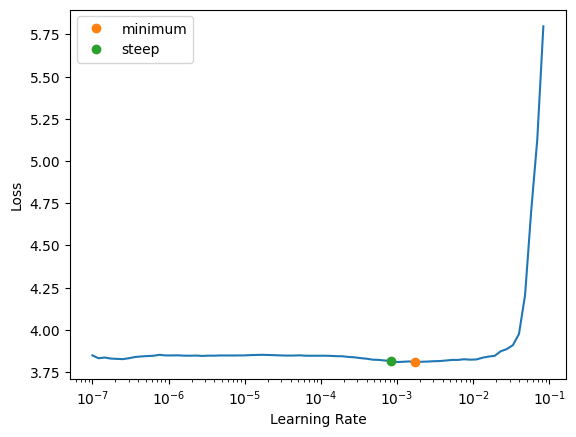

In [21]:
learner.lr_find(suggest_funcs=[minimum, steep])

In [22]:
learner.fit_one_cycle(2, 4e-4)

epoch,train_loss,valid_loss,accuracy,time
0,2.802505,2.625346,0.242938,31:05
1,2.574740,2.555084,0.252825,31:07


In [23]:
learner.save("movie-classifier-v1")

Path('models/movie-classifier-v1.pth')

In [24]:
learner.export("models/movie-classifier-v1.pkl")

# Stage 2

In [25]:
learner.unfreeze()

/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.10/dist-packages/torch/cuda/amp/grad_scaler.py:118: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


SuggestedLRs(slide=6.30957365501672e-05, valley=1.4454397387453355e-05)

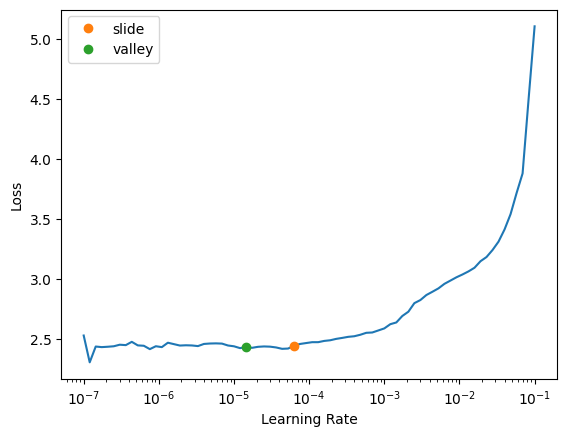

In [26]:
learner.lr_find(suggest_funcs=[slide, valley])

In [27]:
learner.fit_one_cycle(3, slice(7e-3,1e-6))

epoch,train_loss,valid_loss,accuracy,time
0,2.890687,2.848001,0.198446,52:21
1,2.173546,2.889710,0.215395,52:35


epoch,train_loss,valid_loss,accuracy,time
0,2.890687,2.848001,0.198446,52:21
1,2.173546,2.889710,0.215395,52:35
2,0.933882,3.079824,0.209746,50:18
